In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
print(df.shape)
print(df.info())
df.describe()

(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='embarked', ylabel='count'>

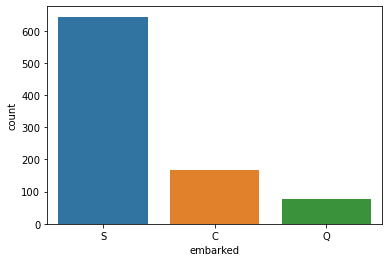

In [3]:
# 条形图
sns.countplot(df['embarked'])

<AxesSubplot:ylabel='embarked'>

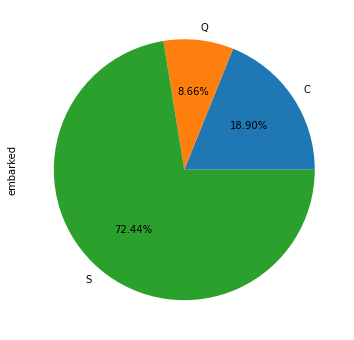

In [4]:
# 饼图
embarked_cnt = df.groupby('embarked')['embarked'].count()
embarked_cnt.plot.pie(autopct='%1.2f%%', figsize=(6, 6))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

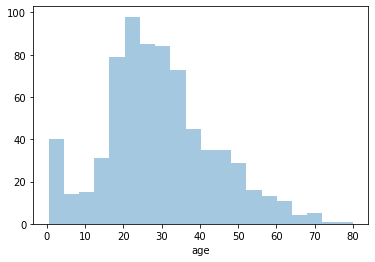

In [5]:
# 直方图
sns.distplot(df[df.age.isnull().values == False]['age'], kde=False)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

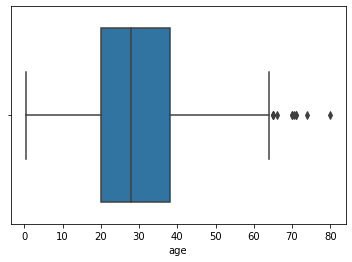

In [6]:
# 箱形图
sns.boxplot(df['age'], orient='h')

<AxesSubplot:xlabel='survived', ylabel='age'>

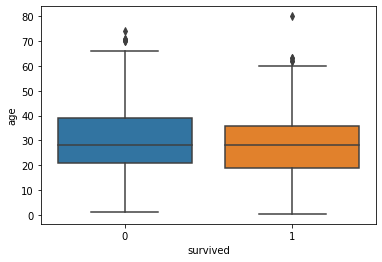

In [7]:
# 根据某个标签变量画箱形图。
sns.boxplot(x='survived', y='age', data=df)

<AxesSubplot:ylabel='age'>

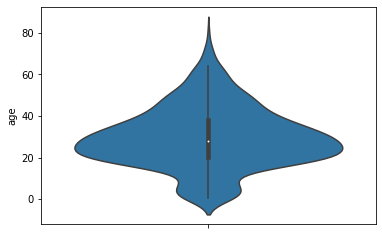

In [8]:
# 小提琴图
sns.violinplot(y=df['age'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='pclass', ylabel='age'>

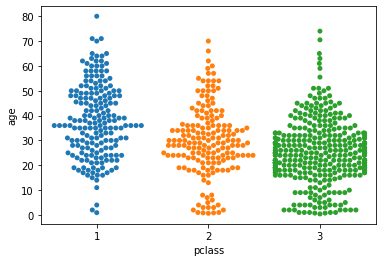

In [9]:
# 双变量可视化分析
sns.swarmplot(y='age', x='pclass', data=df)

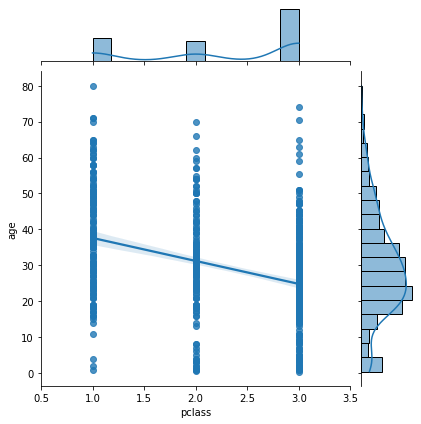

In [19]:
# pearson correlation

sns.jointplot(x='pclass', y='age', data=df, kind='reg', xlim=(0.5, 3.5))

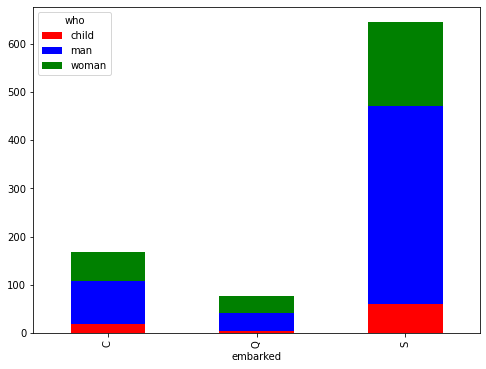

In [21]:
# categorical variables
embark_who_cnt = df.groupby(['embarked', 'who']).who.count()
embark_who_cnt.unstack().plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], figsize=(8, 6))
plt.show()

In [23]:
# 卡方检验
from scipy.stats import chi2_contingency
embarked_alive = pd.crosstab(df.embarked, df.alive)
chi2, p, dof, ex = chi2_contingency(embarked_alive)
print('chi2: ', chi2)
print('p_value: ', p)
print('freedom: ', dof)
print('ex: ', ex)

chi2:  26.48914983923762
p_value:  1.769922284120912e-06
freedom:  2
ex:  [[103.7480315  64.2519685]
 [ 47.5511811  29.4488189]
 [397.7007874 246.2992126]]


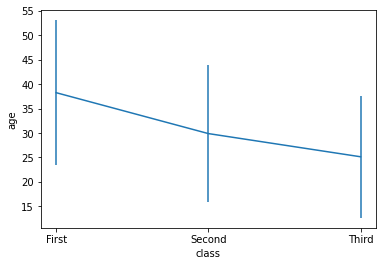

In [25]:
# 含有误差条的线图
age_grp = df.groupby(['class']).age
plt.errorbar(x=age_grp.mean().index,
             y=age_grp.mean(),
             yerr=age_grp.std())
plt.xlabel("class")
plt.ylabel('age')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


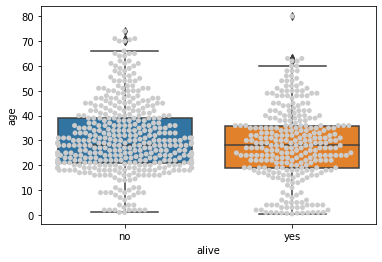

In [26]:
# 组合图
ax = sns.boxplot(x='alive', y='age', data=df)
ax = sns.swarmplot(x='alive', y='age', data=df, color=".8")

In [27]:
from scipy.stats import ttest_ind
df_age = df[df.age.isnull().values == False]
t_stat, p = ttest_ind(df_age[df_age['sex'] == 'female'].age, df_age[df_age['sex'] == 'male'].age)
print('t_stat:', t_stat)
print('p_value: ', p)

t_stat: -2.499206354920835
p_value:  0.012671296797013709
